In [1]:
source("/path/to/the/project/02_notebooks/00_setup.r")

In [2]:
p_load("ggvenn", "PCAtools", "DESeq2", "Rtsne", "pheatmap", "biomaRt", "AnnotationDbi", 
       "org.Mm.eg.db", install = FALSE)

Warning message in p_load("ggvenn", "PCAtools", "DESeq2", "Rtsne", "pheatmap", "biomaRt", :
"Failed to install/load:
Rtsne, org.Mm.eg.db"


## Venn

## Cpos vs Cneg

In [3]:
ccl4_c_up <- read.csv("03_outputs/03/de_ccl4_cpos_cneg_sig_up_wald.csv", row.names = 1)
ccl4_c_down <- read.csv("03_outputs/03/de_ccl4_cpos_cneg_sig_down_wald.csv", row.names = 1)
taa_c_up <- read.csv("03_outputs/03/de_taa_cpos_cneg_sig_up_wald.csv", row.names = 1)
taa_c_down <- read.csv("03_outputs/03/de_taa_cpos_cneg_sig_down_wald.csv", row.names = 1)

In [4]:
venn_dataframe <- list("CCL4 down" = rownames(ccl4_c_down),
                       "CCL4 up" = rownames(ccl4_c_up),
                        "TAA up" = rownames(taa_c_up),
                        "TAA down" = rownames(taa_c_down))

In [5]:
F1_D <- ggvenn(venn_dataframe,
  fill_color = c("#063852", "#063852", "#F0810F", "#F0810F"),
  stroke_size = 0.5, set_name_size = 4)

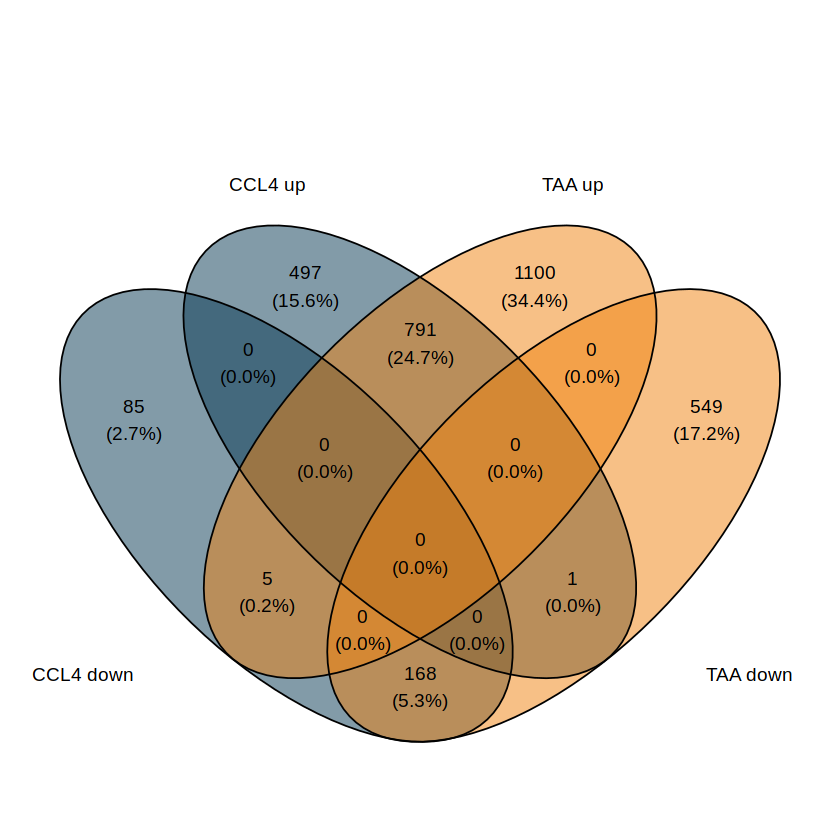

In [6]:
F1_D

In [7]:
ccl4_up_unique <- setdiff(venn_dataframe$`CCL4 up`, c(venn_dataframe$`TAA up`, venn_dataframe$`TAA down`))
taa_up_unique <- setdiff(venn_dataframe$`TAA up`, c(venn_dataframe$`CCL4 up`, venn_dataframe$`CCL4 down`))
ccl4_taa_up_intersect <- intersect(venn_dataframe$`CCL4 up`, venn_dataframe$`TAA up`)
ccl4_taa_down_intersect <- intersect(venn_dataframe$`CCL4 down`, venn_dataframe$`TAA down`)

In [8]:
length(ccl4_up_unique) <- length(taa_up_unique)
length(ccl4_taa_up_intersect) <- length(taa_up_unique)
length(ccl4_taa_down_intersect) <- length(taa_up_unique)

In [9]:
df <- cbind(X = as.data.frame(ccl4_up_unique), Y = as.data.frame(taa_up_unique), C =  as.data.frame(ccl4_taa_up_intersect), D = as.data.frame(ccl4_taa_down_intersect))

### Regression vs Cpos

In [7]:
ccl4_up_reg <- read.csv("03_outputs/03/de_ccl4_reg_pos_sig_up_wald.csv", row.names = 1)
ccl4_down_reg <- read.csv("03_outputs/03/de_ccl4_reg_pos_sig_down_wald.csv", row.names = 1)
taa_up_reg <- read.csv("03_outputs/03/de_taa_reg_pos_sig_up_wald.csv", row.names = 1)
taa_down_reg <- read.csv("03_outputs/03/de_taa_reg_pos_sig_down_wald.csv", row.names = 1)

In [5]:
venn_dataframe_reg <- list("CCL4 down" = rownames(ccl4_down_reg),
                       "CCL4 up" = rownames(ccl4_up_reg),
                        "TAA up" = rownames(taa_up_reg),
                        "TAA down" = rownames(taa_down_reg))

In [6]:
F_reg <- ggvenn(venn_dataframe_reg,
  fill_color = c("#063852", "#063852", "#F0810F", "#F0810F"),
  stroke_size = 0.5, set_name_size = 4)

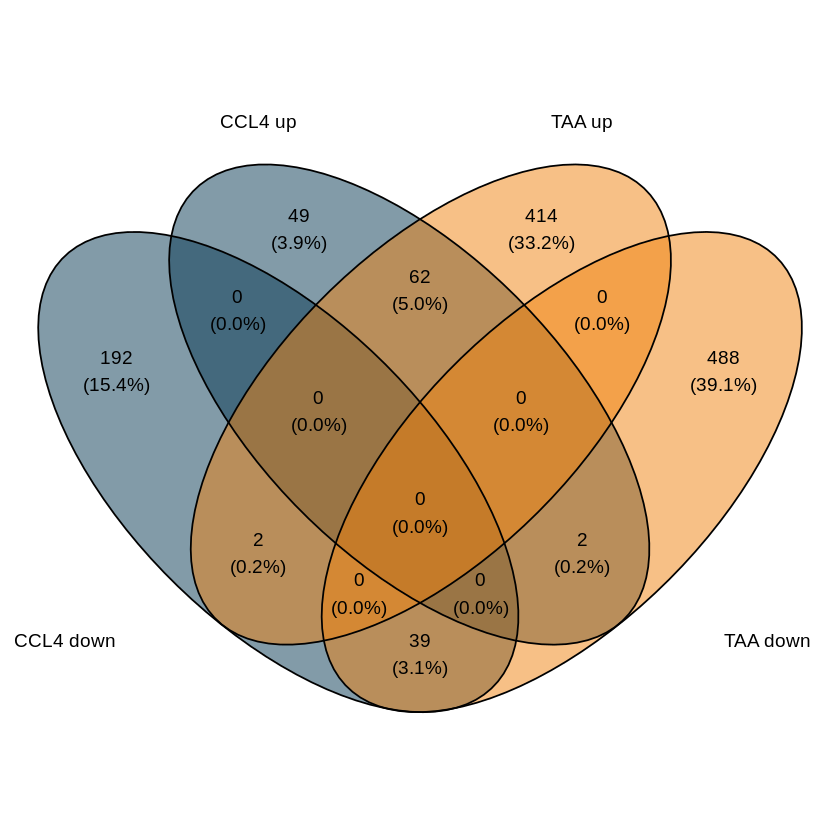

In [7]:
F_reg

In [14]:
ccl4_up_unique_reg <- setdiff(venn_dataframe_reg$`CCL4 up`, c(venn_dataframe_reg$`TAA up`, venn_dataframe_reg$`TAA down`))
taa_up_unique_reg <- setdiff(venn_dataframe_reg$`TAA up`, c(venn_dataframe_reg$`CCL4 up`, venn_dataframe_reg$`CCL4 down`))
ccl4_taa_up_intersect_reg <- intersect(venn_dataframe_reg$`CCL4 up`, venn_dataframe_reg$`TAA up`)
ccl4_taa_down_intersect_reg <- intersect(venn_dataframe_reg$`CCL4 down`, venn_dataframe_reg$`TAA down`)

In [15]:
length(ccl4_up_unique_reg) <- length(taa_up_unique_reg)
length(ccl4_taa_up_intersect_reg) <- length(taa_up_unique_reg)
length(ccl4_taa_down_intersect_reg) <- length(taa_up_unique_reg)

In [16]:
df_reg <- cbind(X = as.data.frame(ccl4_up_unique_reg), Y = as.data.frame(taa_up_unique_reg), C =  as.data.frame(ccl4_taa_up_intersect_reg), D = as.data.frame(ccl4_taa_down_intersect_reg))

## Overlaps dataframes

In [9]:
overlap_df_1 <- data.frame(gene = intersect(rownames(ccl4_c_up), rownames(taa_c_up)), overlap = "CCl4_TAA_CIR_UP")
overlap_df_2 <- data.frame(gene = intersect(rownames(ccl4_c_down), rownames(taa_c_down)), overlap = "CCl4_TAA_CIR_DOWN")
overlap_df_3 <- data.frame(gene = intersect(rownames(ccl4_up_reg), rownames(taa_up_reg)), overlap = "CCl4_TAA_REG_UP")
overlap_df_4 <- data.frame(gene = intersect(rownames(ccl4_down_reg), rownames(taa_down_reg)), overlap = "CCl4_TAA_REG_DOWN")

In [18]:
overlap_df <- dplyr::bind_rows(overlap_df_1, overlap_df_2, overlap_df_3, overlap_df_4)

## Biotmle

In [18]:
biotmle_cir <- read.csv("03_outputs/06/biotmle_top_genes_batch_sig.csv")

In [19]:
biotmle_cir_up <- biotmle_cir %>% filter(AveExpr > 1.5)

In [20]:
biotmle_cir_down <- biotmle_cir %>% filter(AveExpr < 1.5)

In [21]:
tmp <- mapIds(org.Mm.eg.db, as.character(biotmle_cir_up$ID), "SYMBOL","ENTREZID")
tmp <- as.data.frame(tmp) %>% tidyr::drop_na() #%>% tibble::rownames_to_column("tmp")

tmp1 <- mapIds(org.Mm.eg.db, as.character(biotmle_cir_down$ID), "SYMBOL","ENTREZID")
tmp1 <- as.data.frame(tmp1) %>% tidyr::drop_na()# %>% tibble::rownames_to_column("tmp")

'select()' returned 1:1 mapping between keys and columns

'select()' returned 1:1 mapping between keys and columns



In [ ]:
biotmle_cir <- tmp %>% tibble::column_to_rownames("ID")
biotmle_cir <- tmp1 %>% tibble::column_to_rownames("ID")

In [24]:
venn_dataframe <- list(
    #"CCL4 down" = rownames(ccl4_c_down),
#                       "CCL4 up" = rownames(ccl4_c_up),
                      "TAA up" = rownames(taa_c_up),
                       "TAA down" = rownames(taa_c_down),
                         "Biotmle up" = tmp$tmp,
                         "Biotmle down" = tmp1$tmp1)

In [25]:
F1_D <- ggvenn(venn_dataframe,
  fill_color = c("#063852", "#063852", "#F0810F", "#F0810F", "#AAAAAA", "#AAAAAA"),
  stroke_size = 0.5, set_name_size = 4)

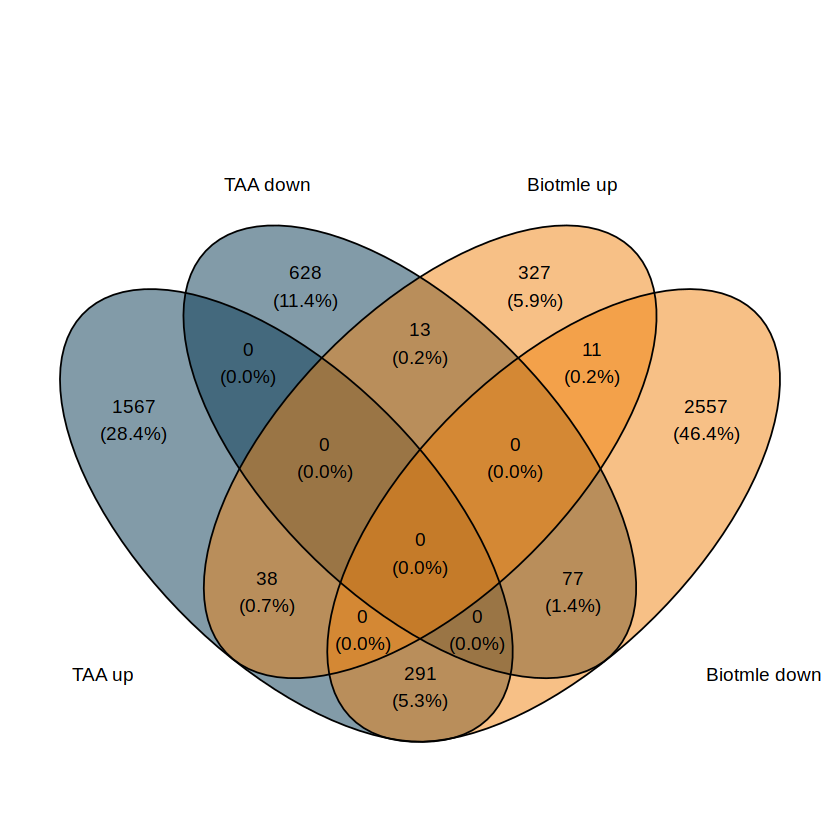

In [26]:
F1_D

## Dimensionality reduction - PCA

In [4]:
metadata <- read.csv("2022_08_12_CDL_regression_sample_annotation.csv", row.names = 1)
data <- read.csv("03_outputs/02/count_matrix_annotated.csv", row.names = 1)
count_matrix <- data 

In [5]:
metadata <- metadata %>%
  tidyr::unite("Model_group", Model:Group, remove = FALSE)

In [6]:
metadata <- metadata %>% tibble::column_to_rownames(var="Sample_id")

In [7]:
metadata$Group <- as.factor(metadata$Group)

In [8]:
metadata$Group <- relevel(metadata$Group, "Cpos")
metadata$Group <- relevel(metadata$Group, "Cneg")

In [10]:
dds_intercept <- DESeqDataSetFromMatrix(countData = count_matrix, colData = metadata,
  design = ~Model_group)
#dds_intercept <- DESeq(dds_intercept, test="LRT", reduced = ~ 1)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"


In [11]:
vst_normalized <- vst(dds_intercept)

In [11]:
set.seed(42)

In [13]:
matrix_normalized <- assay(vst_normalized)
columndata <- DataFrame(metadata)
pca_calculated <- pca(matrix_normalized, metadata = metadata, removeVar = 0.1)

-- removing the lower 10% of variables based on variance



Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


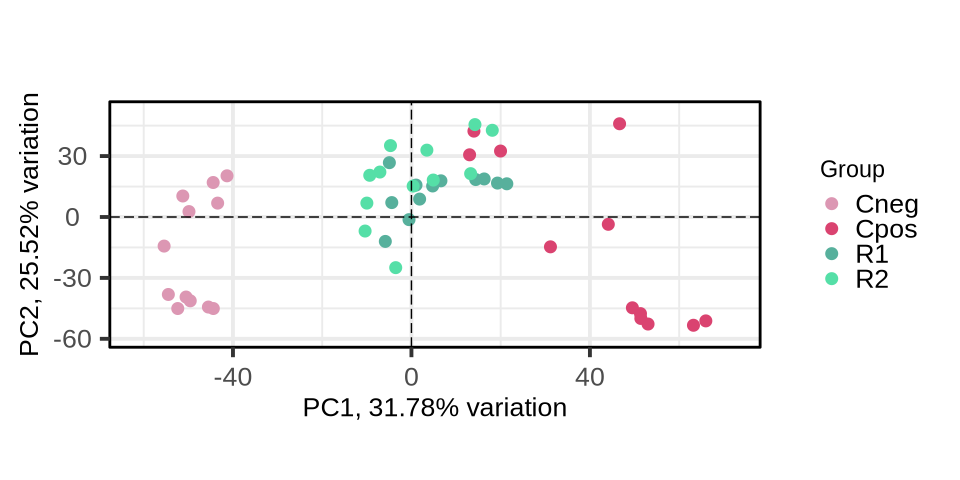

In [14]:
options(repr.plot.width = 8, repr.plot.height = 4)

F1_B <- biplot(pca_calculated, lab = NULL, colby = "Group", colkey = c(Cneg = "#dc97b3", Cpos = "#da4370", R1 = "#57b09c",
  R2 = "#55dfa7"), hline = 0, vline = 0, legendPosition = "right", legendLabSize = 16,
  legendIconSize = 3)

F1_B

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is

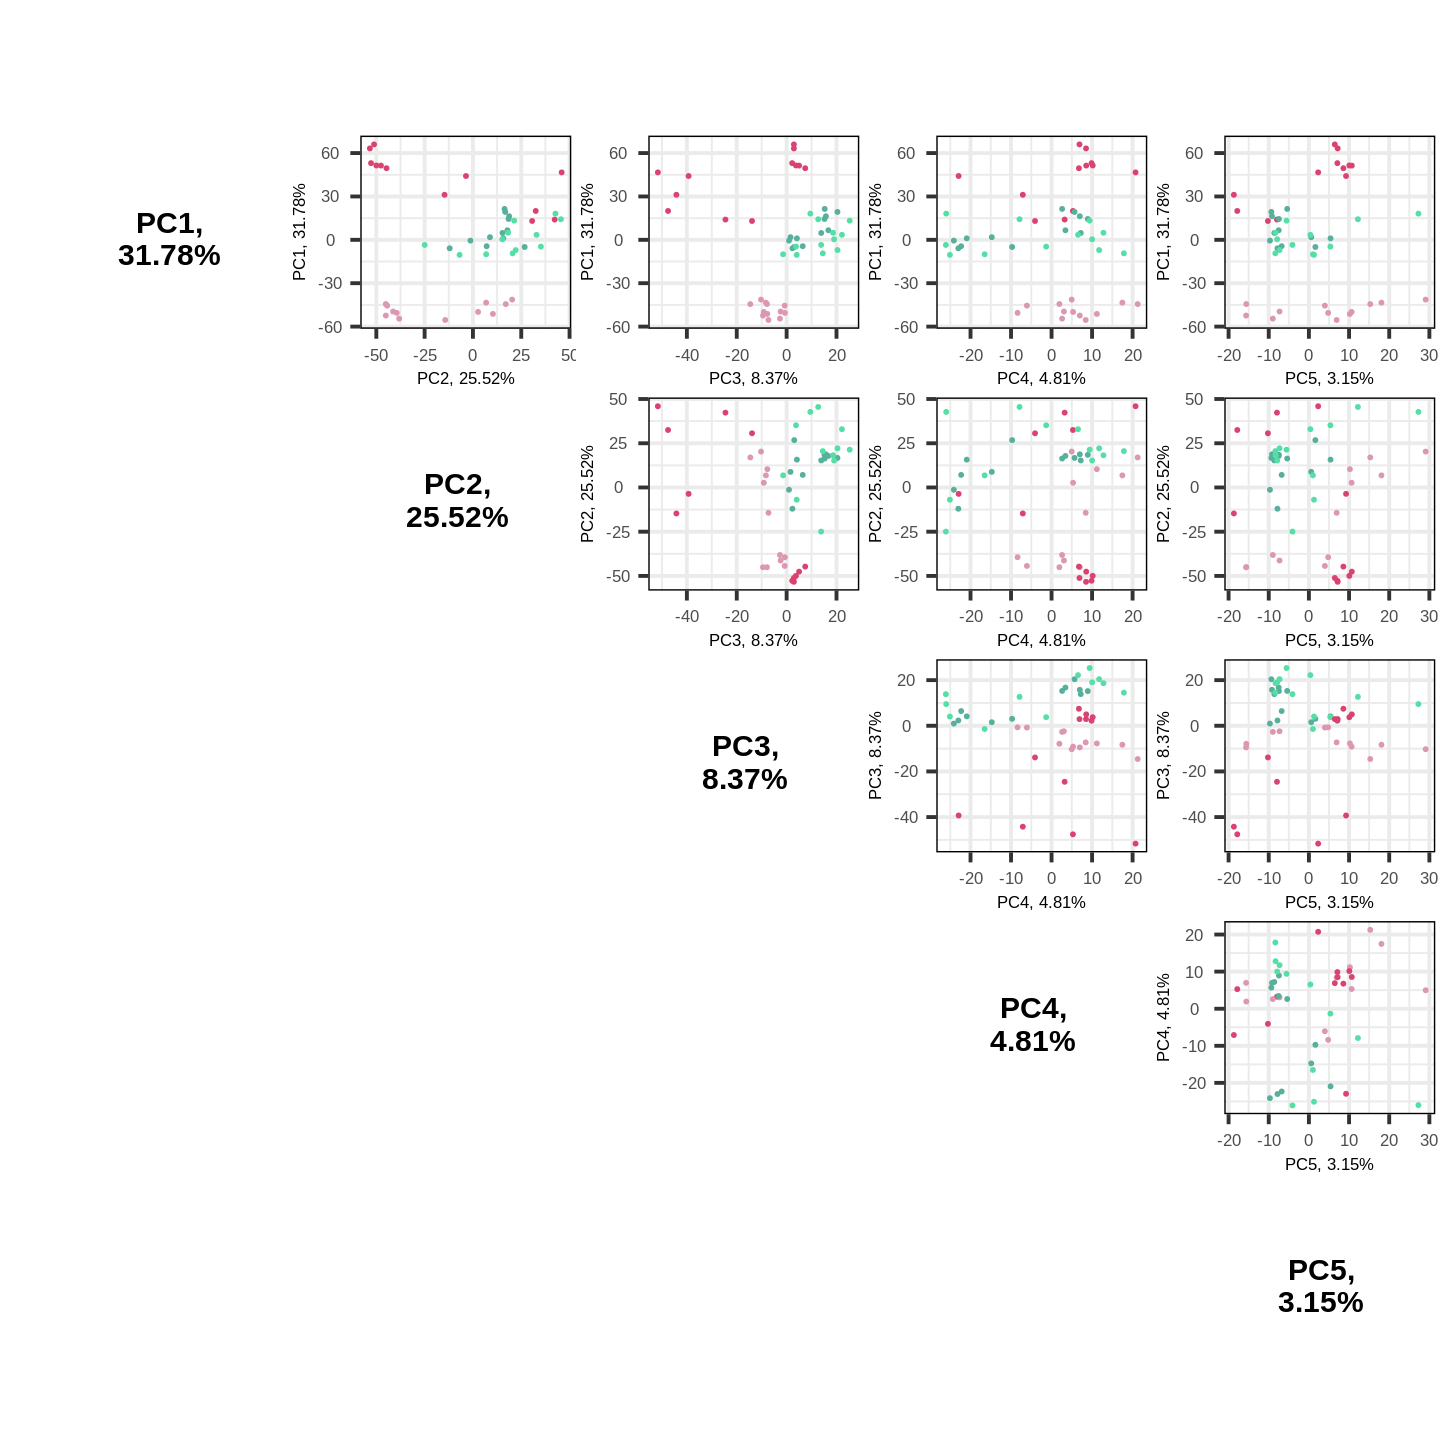

In [14]:
 options(repr.plot.width = 12, repr.plot.height = 12)
 pairsplot(pca_calculated, colby = 'Group', 
            colkey = c(Cneg = "#dc97b3", Cpos = "#da4370", R1 = "#57b09c",
            R2 = "#55dfa7"))

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is

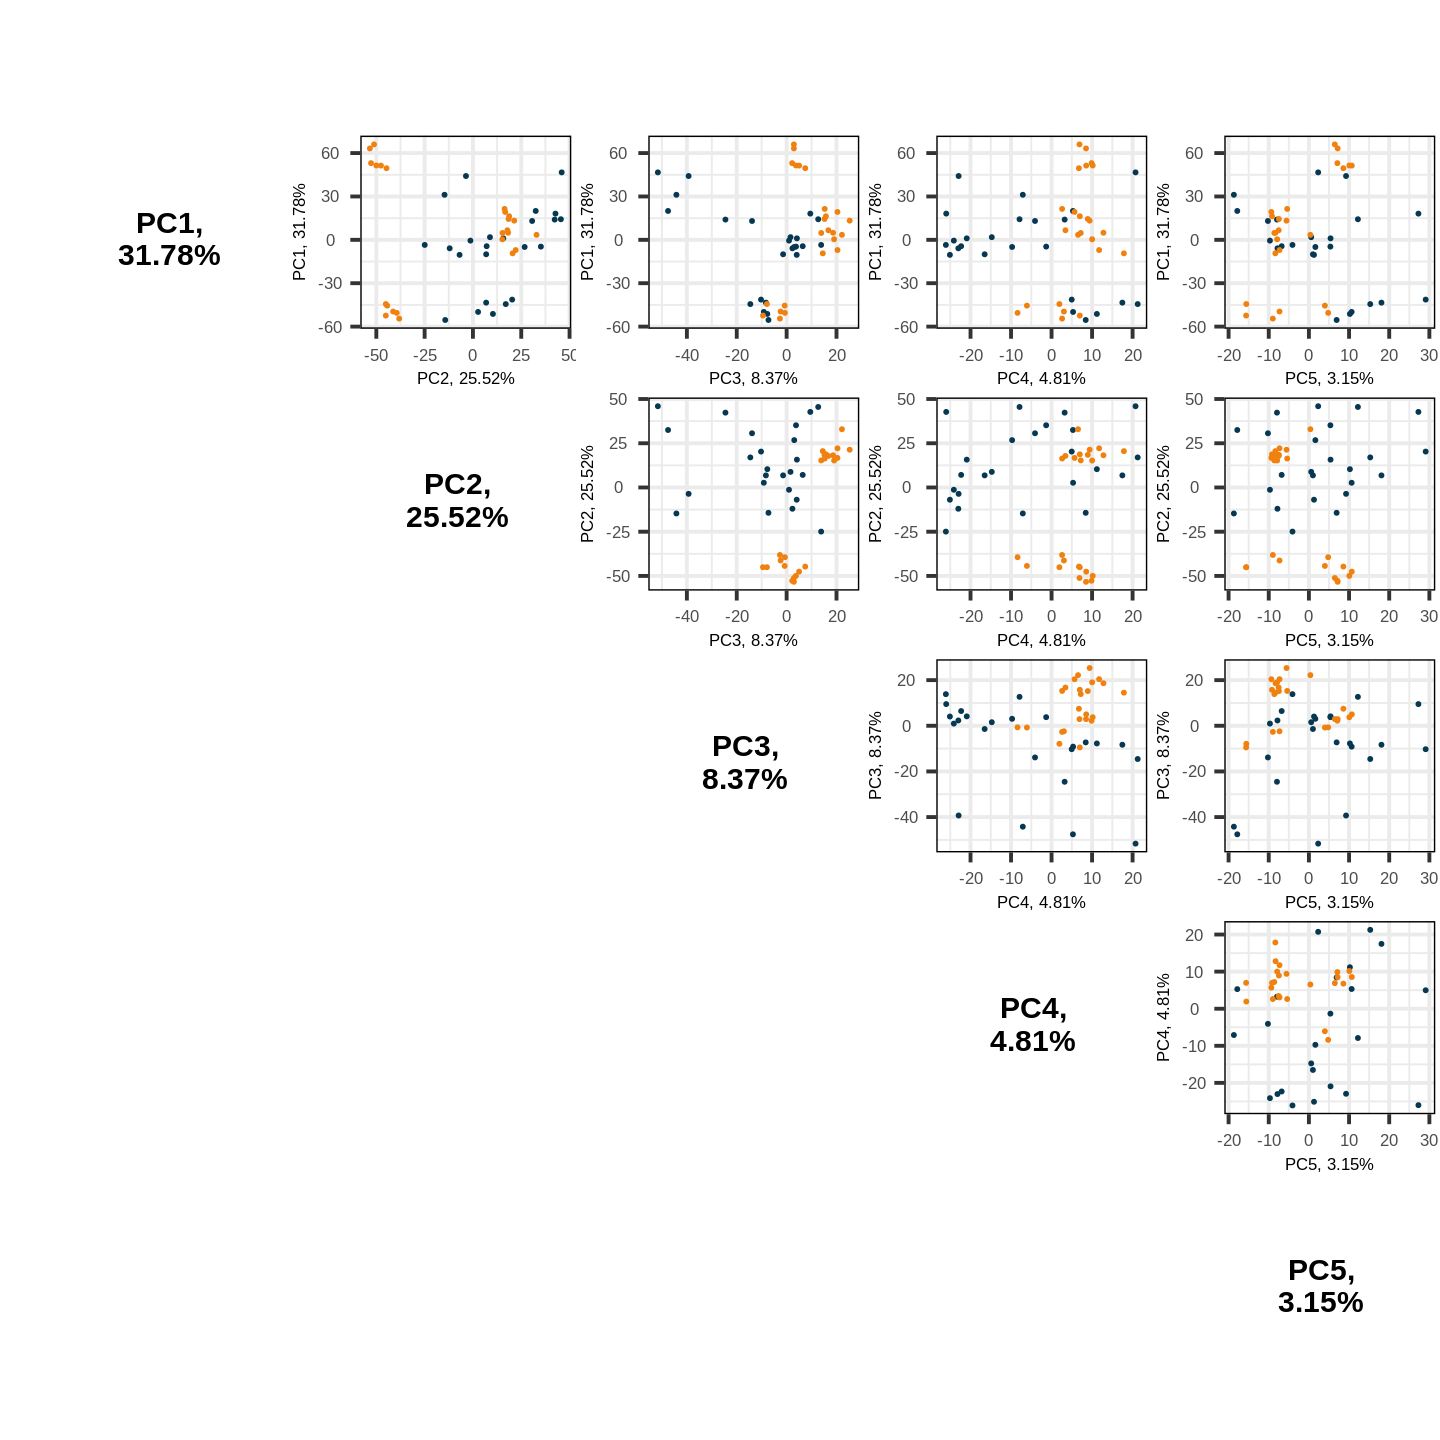

In [15]:
 options(repr.plot.width = 12, repr.plot.height = 12)
 pairsplot(pca_calculated, colby = 'Model',
            colkey = c(CCL4 = '#063852', TAA='#F0810F'))

In [17]:
# https://bioconductor.org/packages/devel/bioc/vignettes/PCAtools/inst/doc/PCAtools.html#determine-the-variables-that-drive-variation-among-each-pc
F1_B_s <- plotloadings(pca_calculated, components = getComponents(pca_calculated,
  c(1, 2)), rangeRetain = 0.10, labSize = 4, title = "Loadings plot", subtitle = "Principal components 1 and 2",
  caption = "Top 10% variables", shape = 24, col = c("limegreen", "black", "red3"),
  drawConnectors = TRUE)

-- variables retained:

Sprr1a, Ly6d, Gpnmb, Cdkn1a, Mmp7, Cd63, Hsd3b5, Slc1a2, Slco1a1, Elovl3, Rgs16, Inmt, Rad51b, Fgf21, Abhd2, Scd4, Lmbrd2, Mia2, Uhmk1, Rassf8, Megf9, Cpeb4



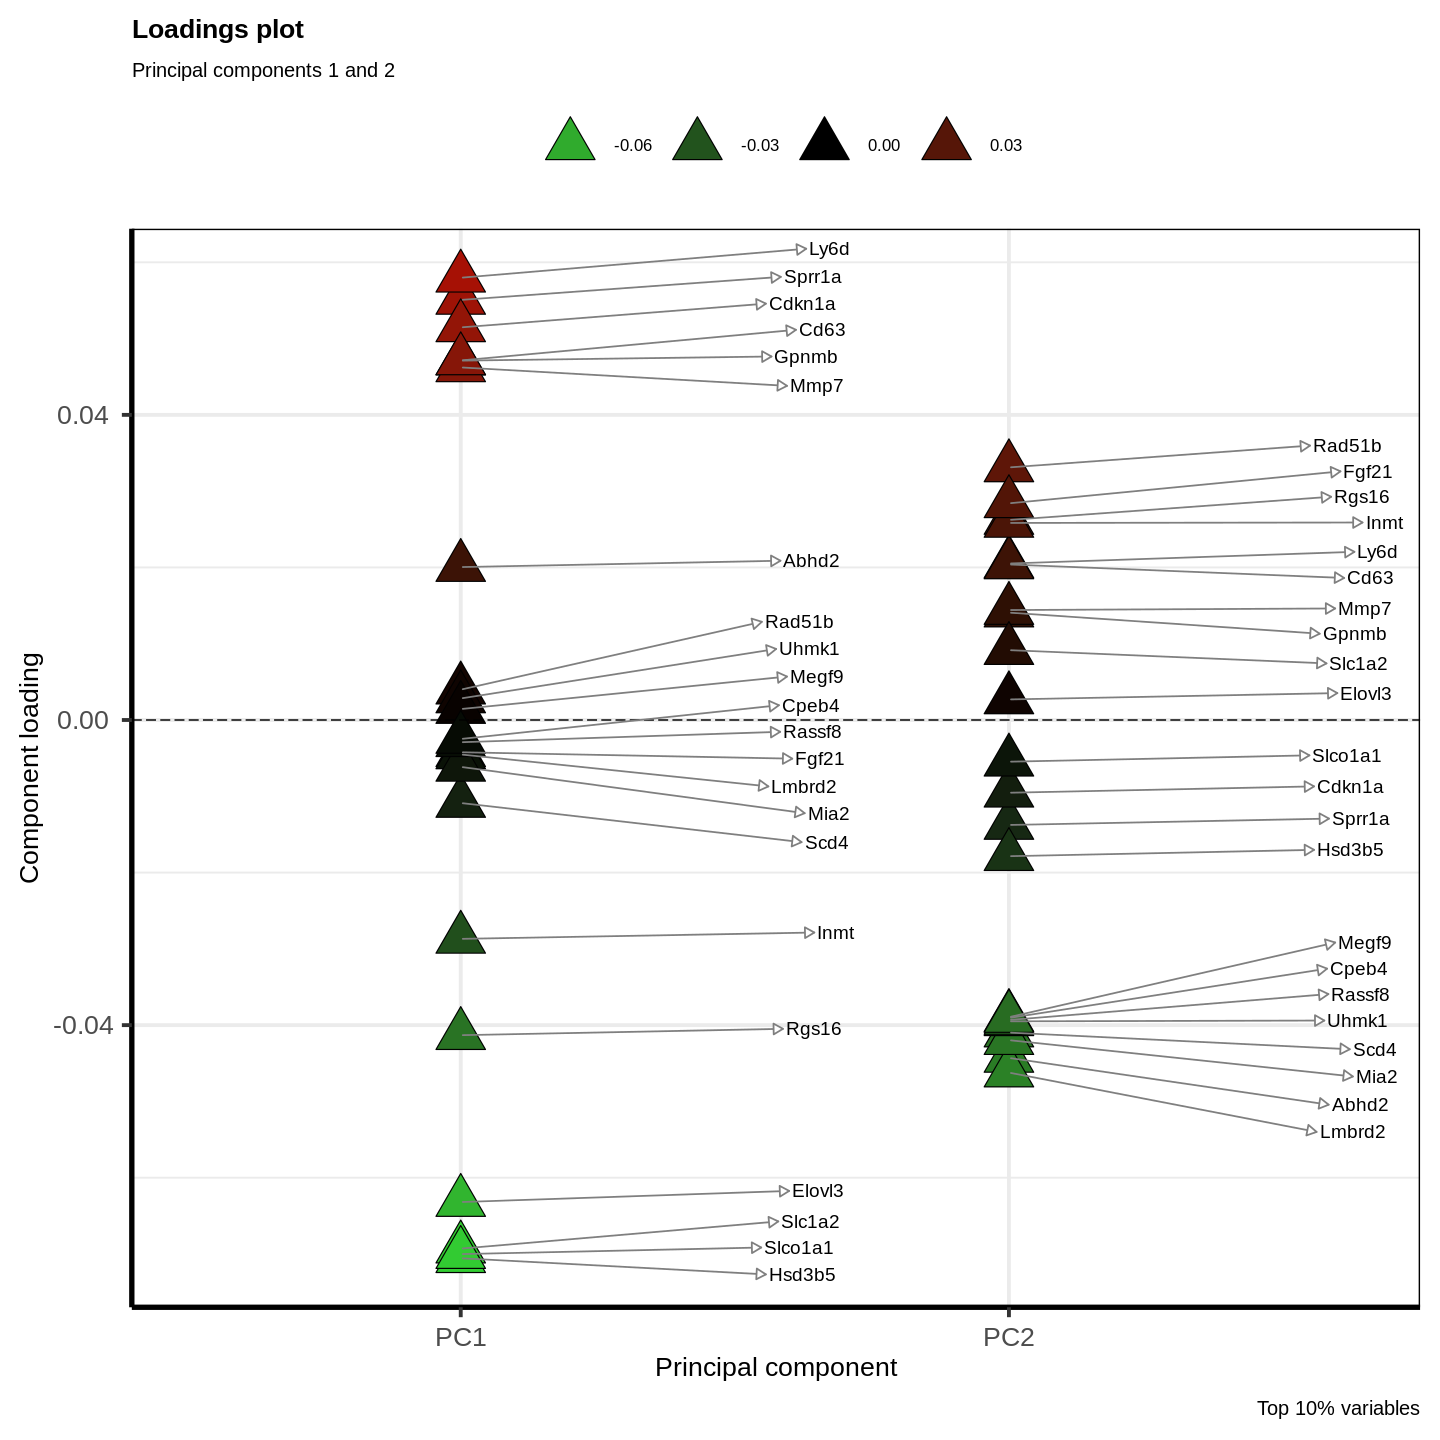

In [18]:
F1_B_s

In [15]:
pcs <- c("Sprr1a", "Ly6d", "Gpnmb", "Cdkn1a", "Mmp7", "Cd63", "Hsd3b5", "Slc1a2", "Slco1a1", "Elovl3", "Rgs16", "Inmt", "Rad51b", "Fgf21", "Abhd2", "Scd4", "Lmbrd2", "Mia2", "Uhmk1", "Rassf8", "Megf9", "Cpeb4")

### Heatmap

In [16]:
vst_norm <- vst(dds_intercept)
mat <- as.data.frame(assay(vst_norm))
mat <- mat %>% as.matrix()
mat <- mat[pcs,]

In [30]:
hcl.colors(6, "TealRose", rev = TRUE)

[1] "#D35C79" "#D79D86" "#E4D1B3" "#CED7BA" "#8AB49B" "#009593"

In [24]:
colfunc <- colorRampPalette(c("#9f294c", "#e4f0ff", "#27678a"))
col_100 <- colfunc(100)
col_100 <- col_100[rev(1:length(col_100))]

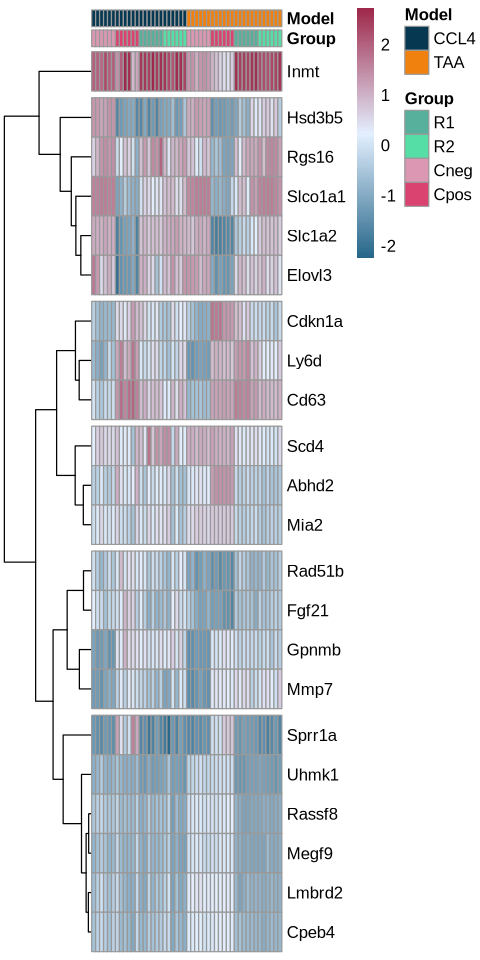

In [25]:
options(repr.plot.width = 4, repr.plot.height = 8)

annotation <- as.data.frame(colData(dds_intercept)[, c("Group", "Model")])

ann_colors <- list(Group = c(`R1` = "#57b09c", `R2` = "#55dfa7", Cneg = "#dc97b3",
  Cpos = "#da4370"), Model = c(CCL4 = "#063852", TAA = "#F0810F"))

F1_A <- pheatmap(scale(mat), color = col_100, cluster_rows = TRUE,
  show_rownames = TRUE, cluster_cols = FALSE,
  show_colnames = FALSE, annotation_col = annotation, annotation_colors = ann_colors, clustering_method = "ward.D2",
  cutree_rows = 6)

## Outputs

In [19]:
write.csv(overlap_df, file = "03_outputs/04/overlap_df.csv")

In [ ]:
write.csv(df, file="03_outputs/04/venn_diagram_genes.csv")

In [ ]:
write.csv(df_reg, file="03_outputs/04/venn_diagram_genes_reg.csv")

In [ ]:
write.csv(ccl4_taa_up_intersect, file="03_outputs/04/ccl4_taa_up_cir_intersect.csv")
write.csv(ccl4_taa_down_intersect, file="03_outputs/04/ccl4_taa_down_cir_intersect.csv")

In [ ]:
write.csv(ccl4_taa_up_intersect_reg, file="03_outputs/04/ccl4_taa_up_reg_intersect.csv")
write.csv(ccl4_taa_down_intersect_reg, file="03_outputs/04/ccl4_taa_down_reg_intersect.csv")